## Density real data 

In [1]:
path = "/media/juan/jprb/PhD_2020_2023/Data/pc_2018_08_02_L01_P18_filtered_apples2annotated_noFloor"

In [2]:
import os 
import glob 

ls_fls = glob.glob( os.path.join( path, "*.txt" ) )

print("Found: %i" %(len(ls_fls)))

Found: 9


In [3]:
import numpy as np 
from pointCloudsDescriptor import PointCloudFEvaluator

pcEval = PointCloudFEvaluator()

dic2plot = {}

for  idx1, afile in enumerate(ls_fls):
    print("file[%i/%i]" %(idx1+1, len(ls_fls)), end="\r" if (idx1<len(ls_fls)) else "\n" )
    a_pc = np.loadtxt(afile)[:,0:3]
    alsDens = pcEval.get_point_cloud_avg_density(a_pc)
    if(idx1 not in dic2plot.keys()):
        dic2plot[idx1] = alsDens
    else:
        dic2plot[idx1].append( alsDens )


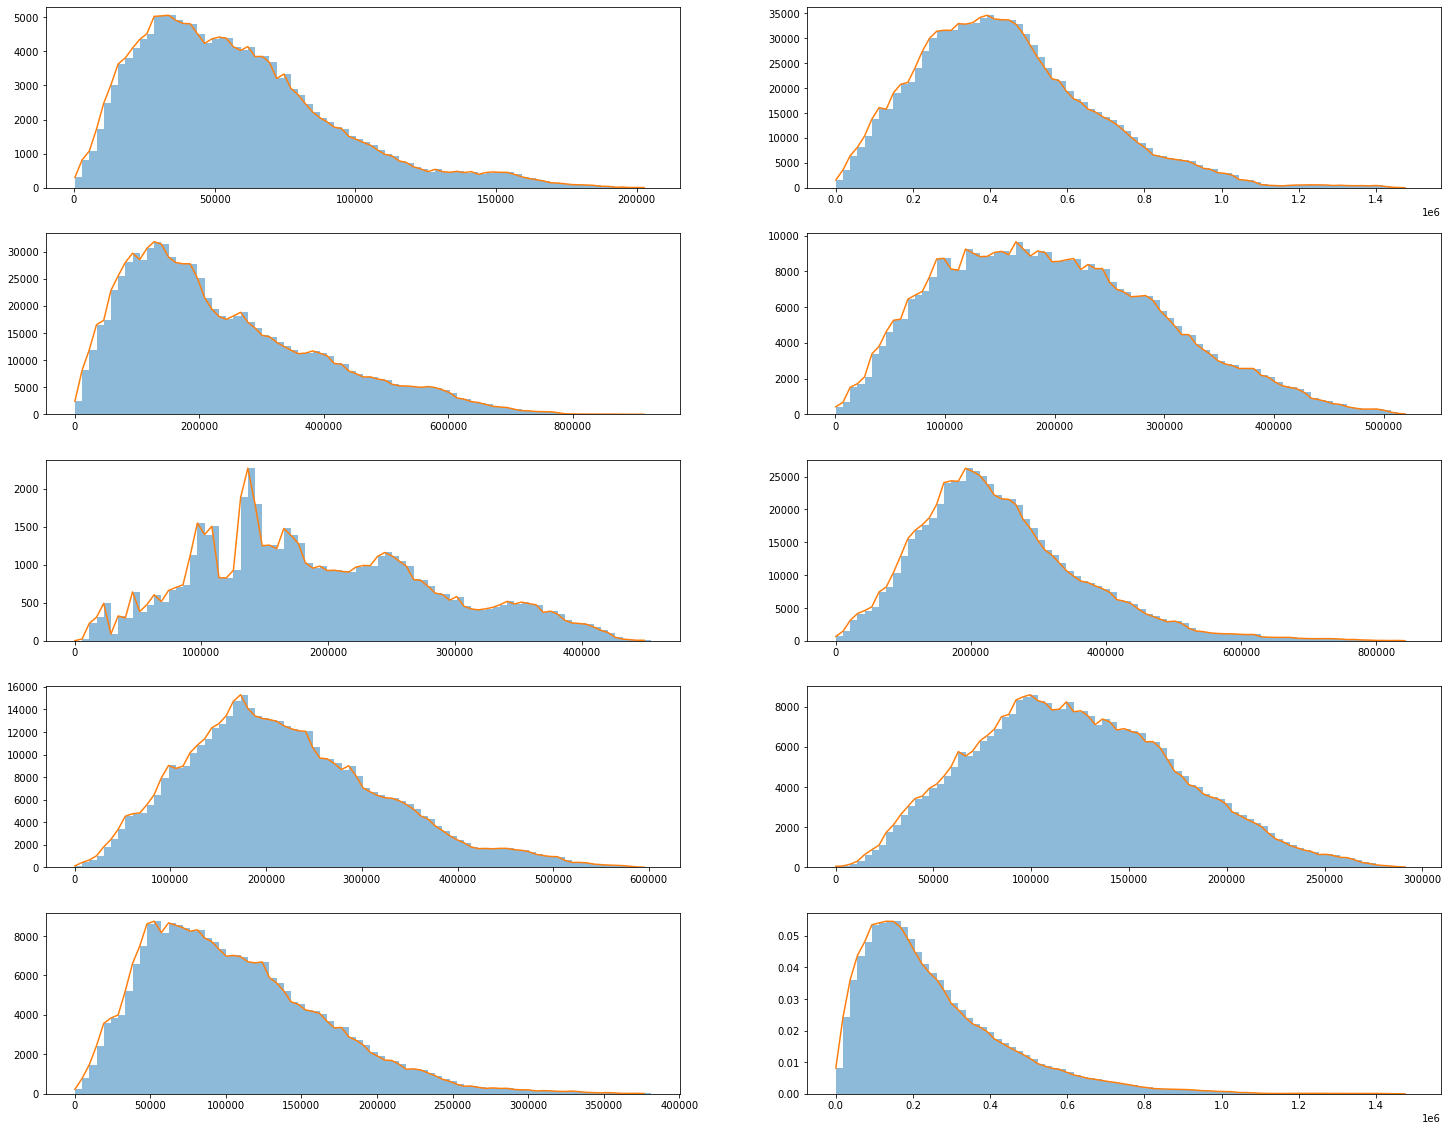

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.rcParams['figure.figsize'] = [25, 20]
fig, ax = plt.subplots(nrows=5, ncols=2, sharey=True)
plt.subplots_adjust(wspace=0.2, hspace=0.25)



weights_real_0 = np.ones_like(dic2plot[0]) / float(len(dic2plot[0]))

weights_real_1 = np.ones_like(dic2plot[1]) / float(len(dic2plot[1]))
a = []
# Plots Real scan Apple Non Apple 
for idx, i in enumerate(dic2plot.keys(), start=1):
    weights_real = np.ones_like(dic2plot[i]) / float(len(dic2plot[i]))
    ax = plt.subplot(5, 2, idx)
    n_real, bins_real, _ = ax.hist(dic2plot[i], bins=80, alpha=0.5, weights=None)
    plt.plot(bins_real[0:len(n_real)], n_real)
    a = a + dic2plot[i]

weights_real = np.ones_like(a) / float(len(a))
ax = plt.subplot(5, 2, 10)
n_real, bins_real, _  = ax.hist(a, bins=80, alpha=0.5, weights=weights_real )

plt.plot(bins_real[0:len(n_real)], n_real)

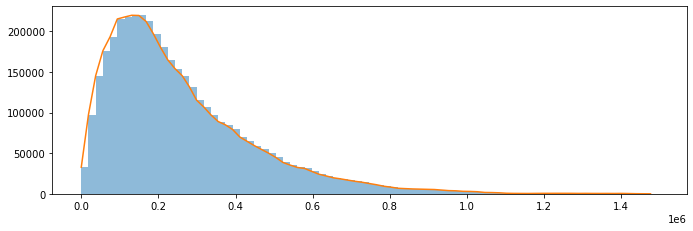

In [36]:
weights_real = np.ones_like(a) / float(len(a))
ax = plt.subplot(5, 2, 10)
n_real, bins_real, _  = ax.hist(a, bins=80, alpha=0.5 )

plt.plot(bins_real[0:len(n_real)], n_real)

In [5]:
weights_real =  [ i/sum(a) for i in a ]  #np.ones_like(a) / float(len(a))
ax = plt.subplot(5, 2, 10)
n_real, bins_real, _  = ax.hist(a, bins=80, alpha=0.5, weights=weights_real )

plt.plot(bins_real[0:len(n_real)], n_real)

KeyboardInterrupt: 